In [51]:
# ONE FIRST NEEDS TO RUN THIS CELL BEFORE LAUNCHING RISE
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
sns.set()
plt.rc('axes', titlesize='xx-large')
plt.rc('axes', labelsize='xx-large') 
plt.rc('legend', fontsize='x-large')
plt.rc('xtick',labelsize='x-large')
plt.rc('ytick',labelsize='x-large')
plt.rc('lines',linewidth=4)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

np.random.seed(0)
np.set_printoptions(suppress=True, precision=2)

from keras import regularizers, optimizers
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import SVG

import pickle

with open('../data/acc_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    acc_grid =pickle.load(f)
    
with open('../data/loss_grid', 'rb') as f:
    loss_grid =pickle.load(f)

# An introduction to neural networks with Keras
Dr. Florent Martin (Universität Regensburg)  
March 2018

**Machine Learning**
* choose a **MODEL** which depends on **PARAMETERS**
*  learn from **DATA**
* choose model parameters that **FIT** the data

**Neural Networks**  =  family of models

**Keras** = Python Library for Neural Networks

<img style="height:600px;margin: -5px 0px 0px 100px" src="../figures/img/table1.png">

1. Logistic Regression
  1. Iris Dataset
  3. Logistic Regression with scikit-learn
  4. Logistic Regression with Keras
1. Gradient descent 
  1. Optimization
  2. Loss function
1. Neural Networks
  2. Logistic Regression again
  3. Neural Networks with hidden layers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Part 1  
# Before Neural Networks: Logistic Regression

# 1.1. Iris dataset

In [3]:
iris  = sns.load_dataset("iris")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

<center><font size=7>Setosa</font></center> | <center><font size=7>**Versicolor**</font></center> | <center><font size=7> **Virginica** </font></center>
---|---|---
![setosa](../figures/img/setosa.jpg) | ![setosa](../figures/img/versicolor.jpg) | ![setosa](../figures/img/virginica.jpg)

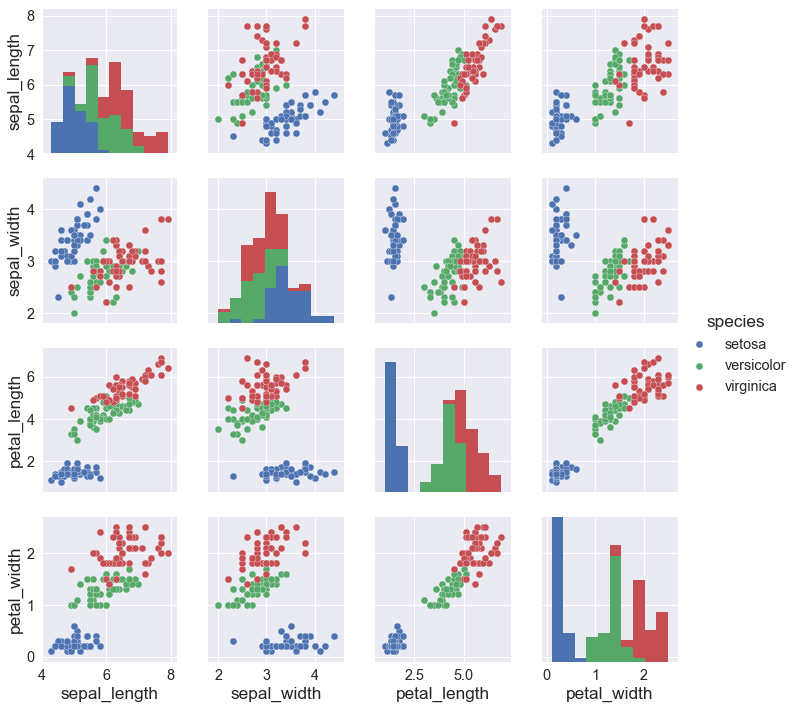

In [6]:
sns.pairplot(iris , hue="species");

### Goal: knowing the petal width, predict if the iris is a virginica  

**Input** = petal width

**Question**: Is the iris sample a virginica?

**Output** =  False / True (equivalently 0 / 1)

In [7]:
iris['isVirginica'] = (iris['species'] == 'virginica').astype(int)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,isVirginica
92,5.8,2.6,4.0,1.2,versicolor,0
141,6.9,3.1,5.1,2.3,virginica,1
130,7.4,2.8,6.1,1.9,virginica,1
119,6.0,2.2,5.0,1.5,virginica,1
48,5.3,3.7,1.5,0.2,setosa,0


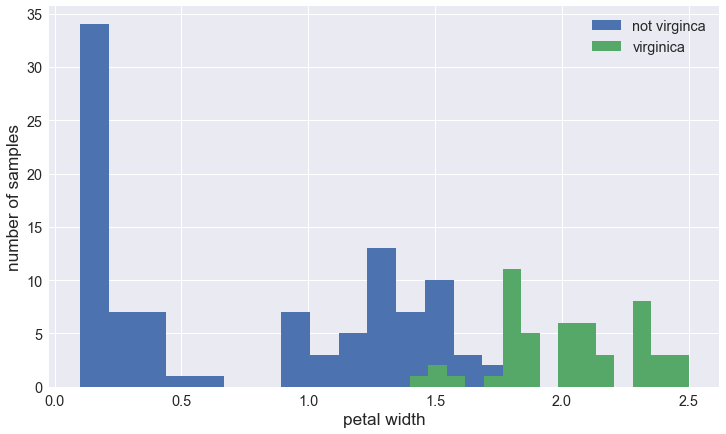

In [8]:
fig, ax = plt.subplots( figsize=(12,7) )
iris.groupby('isVirginica').hist( column='petal_width' , ax = ax , bins=15 )
plt.legend( [ 'not virginca' , 'virginica' ] )
plt.xlabel('petal width')
plt.ylabel('number of samples')
plt.title('');

# Is the plant a virginica?
![guess the probabilities](../figures/img/probas1.png)

# Is the plant a virginica?
![guess the probabilities](../figures/img/probas2.png)

# Is the plant a virginica?
![guess the probabilities](../figures/img/probas3.png)

# Logistic Regression

<font size=6>
**Logistic Regression** models a function 
<br><br>
$$ P: \{\text{petal widths}\} \to [0,1]$$
</font>
* $x = $ petal width 
* $P(x) =$ estimate of the probability that the plant is a virginica.
<br><br>
$$0\leq P(x) \leq 1$$

# Sigmoid function
<br><br>
$$ \sigma : x \mapsto  \frac{1}{1+e^{-x}}$$

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

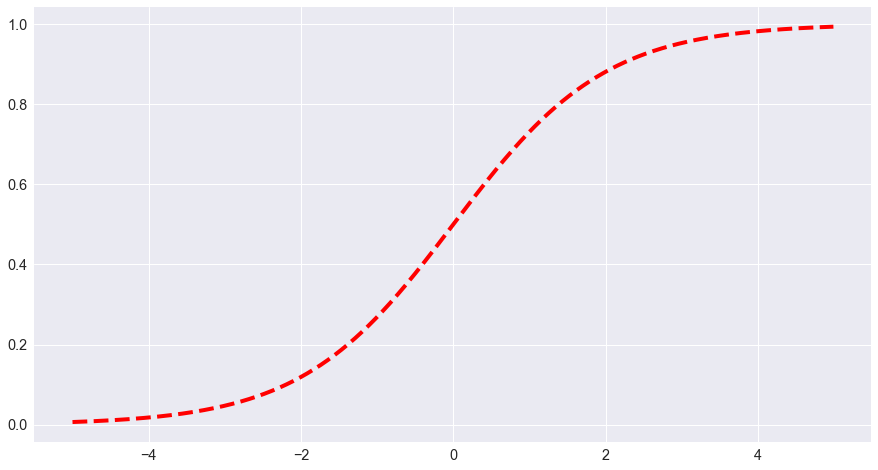

In [10]:
x = np.arange(-5, 5, .01)
fig, ax = plt.subplots(figsize=(15,8))
plt.plot( x , sigmoid(x) , 'r--' );  

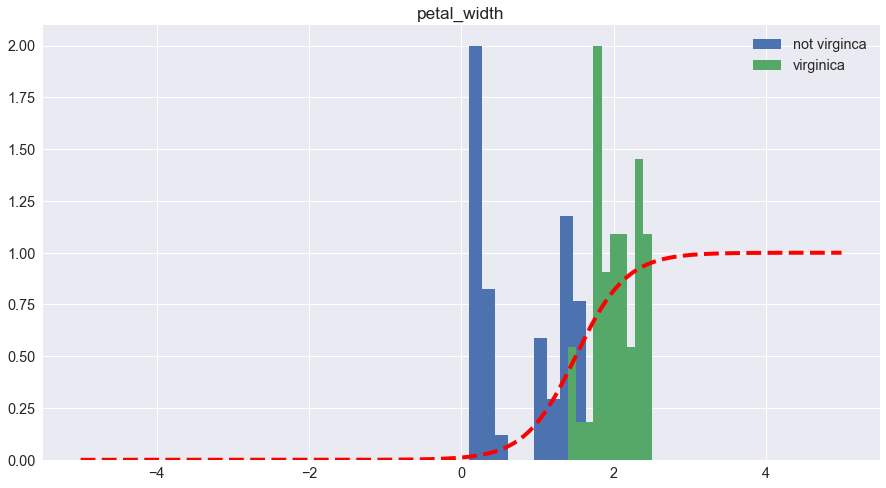

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
iris.groupby('isVirginica').hist(column='petal_width' , normed=True , ax=ax)
plt.legend(['not virginca', 'virginica'])
W = 3
B = -4.5
plt.plot(x, sigmoid(W*x+B) , 'r--' );

<font size=6>
**Logistic Regression** is a model depending on **parameters**:  **W** and **B**.  
    <br>
For an **input x** it  ouputs the **probability**
<br><br>
$$\sigma(Wx+B)$$
where     
$$ \sigma : x \mapsto  \frac{1}{1+e^{-x}}$$
is the **sigmoid** function.   
</font>

## 1.2 Logistic Regression with Scikit-learn

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
model.fit( iris[['petal_width']] , iris['isVirginica'] )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
w , b = model.coef_ , model.intercept_
print(w,b)

[[2.62]] [-4.22]


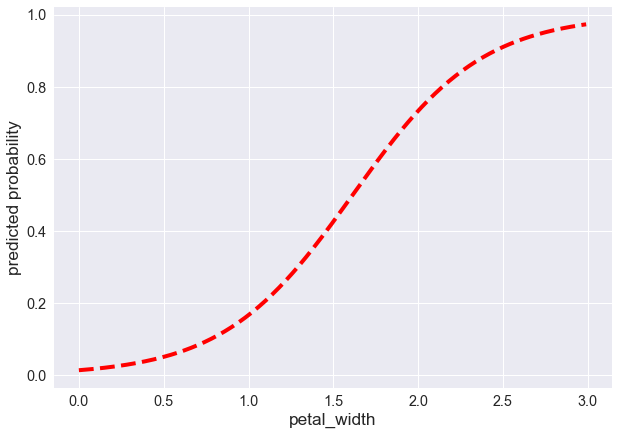

In [28]:
petal_widths = np.arange(0,3,0.01)
predicted_proba = model.predict_proba(petal_widths.reshape(-1,1))[:,1]
plt.figure(figsize=(10,7))
plt.plot(petal_widths, predicted_proba, 'r--')
plt.xlabel('petal_width')
plt.ylabel('predicted probability');

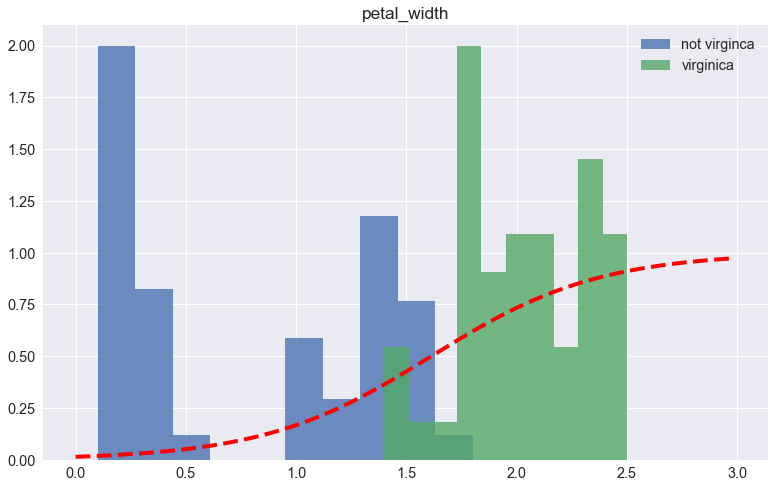

In [29]:
fig, ax = plt.subplots(figsize=(13,8))
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax, alpha=.8)
plt.legend(['not virginca', 'virginica'])
plt.plot(petal_widths, predicted_proba,'r--');

### How to evaluate the model?  

<font size=6>
$$ \textbf{Accuracy} = \frac{\text{number of samples correctly classified}}{\text{total number of samples}}$$
<size>

In [30]:
model.score( iris[['petal_width']] , iris['isVirginica'] )

0.96

# 1.3 Logistic Regression with Keras

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# Computational graph for Logistic Regression

### Choose the parameters:

* W 
* B 

![logistic regression](../figures/img/01-log.png)

![logistic regression](../figures/img/01-log.png)

In [32]:
model = Sequential( [
    Dense(1, input_dim=1), # for the map x -> W*x + B
    Activation('sigmoid') # for the sigmoid function
]  ) 

In [33]:
model.compile(optimizer='sgd', loss='binary_crossentropy' , metrics=['acc'] )

In [34]:
model.fit( iris[['petal_width']] , iris['isVirginica'] , epochs=500 , verbose=False);

In [35]:
model.get_weights() # get the paramters W and B

[array([[1.61]], dtype=float32), array([-2.56], dtype=float32)]

In [36]:
model.metrics_names

['loss', 'acc']

In [37]:
model.evaluate( iris[['petal_width']] , iris['isVirginica'] )

150/150 [==============================] - 0s 142us/step


[0.3496780228614807, 0.9466666706403096]

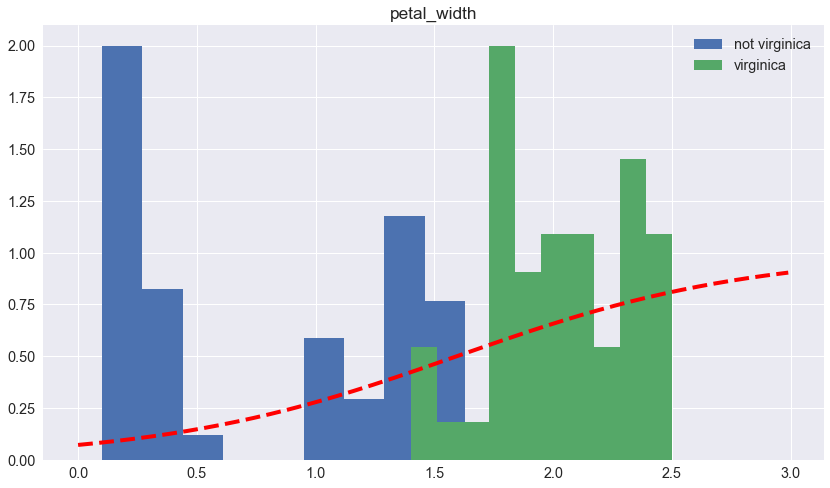

In [38]:
fig, ax = plt.subplots(figsize=(14,8))
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax)
plt.legend(['not virginica', 'virginica'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--');

# Part 2
# Gradient descent

## How does Logistic Regression work? 

# 2.1 Optimization

In [39]:
model = Sequential([
    Dense(1 , input_dim=1 , kernel_regularizer=regularizers.l2(0.1)) ,
    Activation('sigmoid') , 
]) 

In [40]:
model.compile( optimizer='sgd' , loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model.fit( iris[['petal_width']] , iris['isVirginica'] , epochs=500 )

Epoch 1/500
150/150 [==============================] - 0s 533us/step - loss: 0.7456 - acc: 0.6667
Epoch 2/500
150/150 [==============================] - 0s 73us/step - loss: 0.7414 - acc: 0.6667
Epoch 3/500
150/150 [==============================] - 0s 76us/step - loss: 0.7377 - acc: 0.6667
Epoch 4/500
150/150 [==============================] - 0s 76us/step - loss: 0.7340 - acc: 0.6667
Epoch 5/500
150/150 [==============================] - 0s 91us/step - loss: 0.7303 - acc: 0.6667
Epoch 6/500
150/150 [==============================] - 0s 75us/step - loss: 0.7268 - acc: 0.6667
Epoch 7/500
150/150 [==============================] - 0s 82us/step - loss: 0.7235 - acc: 0.6667
Epoch 8/500
150/150 [==============================] - 0s 83us/step - loss: 0.7203 - acc: 0.6667
Epoch 9/500
150/150 [==============================] - 0s 96us/step - loss: 0.7172 - acc: 0.6667
Epoch 10/500
150/150 [==============================] - 0s 73us/step - loss: 0.7143 - acc: 0.6667
Epoch 11/500
150/150 [======

150/150 [==============================] - 0s 103us/step - loss: 0.6106 - acc: 0.7800
Epoch 84/500
150/150 [==============================] - 0s 78us/step - loss: 0.6097 - acc: 0.7800
Epoch 85/500
150/150 [==============================] - 0s 89us/step - loss: 0.6088 - acc: 0.7800
Epoch 86/500
150/150 [==============================] - 0s 85us/step - loss: 0.6080 - acc: 0.7800
Epoch 87/500
150/150 [==============================] - 0s 72us/step - loss: 0.6073 - acc: 0.7800
Epoch 88/500
150/150 [==============================] - 0s 70us/step - loss: 0.6064 - acc: 0.7800
Epoch 89/500
150/150 [==============================] - 0s 88us/step - loss: 0.6056 - acc: 0.7800
Epoch 90/500
150/150 [==============================] - 0s 95us/step - loss: 0.6047 - acc: 0.7800
Epoch 91/500
150/150 [==============================] - 0s 92us/step - loss: 0.6040 - acc: 0.7800
Epoch 92/500
150/150 [==============================] - 0s 90us/step - loss: 0.6033 - acc: 0.7800
Epoch 93/500
150/150 [==========

150/150 [==============================] - 0s 100us/step - loss: 0.5626 - acc: 0.8200
Epoch 166/500
150/150 [==============================] - 0s 85us/step - loss: 0.5623 - acc: 0.8200
Epoch 167/500
150/150 [==============================] - 0s 83us/step - loss: 0.5619 - acc: 0.8200
Epoch 168/500
150/150 [==============================] - 0s 83us/step - loss: 0.5615 - acc: 0.8200
Epoch 169/500
150/150 [==============================] - 0s 71us/step - loss: 0.5612 - acc: 0.8200
Epoch 170/500
150/150 [==============================] - 0s 77us/step - loss: 0.5609 - acc: 0.8200
Epoch 171/500
150/150 [==============================] - 0s 76us/step - loss: 0.5605 - acc: 0.8200
Epoch 172/500
150/150 [==============================] - 0s 84us/step - loss: 0.5601 - acc: 0.8200
Epoch 173/500
150/150 [==============================] - 0s 93us/step - loss: 0.5598 - acc: 0.8200
Epoch 174/500
150/150 [==============================] - 0s 81us/step - loss: 0.5594 - acc: 0.8200
Epoch 175/500
150/150 [

150/150 [==============================] - 0s 83us/step - loss: 0.5406 - acc: 0.8200
Epoch 248/500
150/150 [==============================] - 0s 73us/step - loss: 0.5405 - acc: 0.8200
Epoch 249/500
150/150 [==============================] - 0s 95us/step - loss: 0.5403 - acc: 0.8200
Epoch 250/500
150/150 [==============================] - 0s 77us/step - loss: 0.5401 - acc: 0.8200
Epoch 251/500
150/150 [==============================] - 0s 72us/step - loss: 0.5400 - acc: 0.8200
Epoch 252/500
150/150 [==============================] - 0s 77us/step - loss: 0.5398 - acc: 0.8200
Epoch 253/500
150/150 [==============================] - 0s 87us/step - loss: 0.5397 - acc: 0.8200
Epoch 254/500
150/150 [==============================] - 0s 77us/step - loss: 0.5394 - acc: 0.8200
Epoch 255/500
150/150 [==============================] - 0s 77us/step - loss: 0.5393 - acc: 0.8200
Epoch 256/500
150/150 [==============================] - 0s 82us/step - loss: 0.5391 - acc: 0.8200
Epoch 257/500
150/150 [=

150/150 [==============================] - 0s 78us/step - loss: 0.5300 - acc: 0.8200
Epoch 330/500
150/150 [==============================] - 0s 98us/step - loss: 0.5299 - acc: 0.8200
Epoch 331/500
150/150 [==============================] - 0s 91us/step - loss: 0.5298 - acc: 0.8200
Epoch 332/500
150/150 [==============================] - 0s 73us/step - loss: 0.5297 - acc: 0.8200
Epoch 333/500
150/150 [==============================] - 0s 80us/step - loss: 0.5296 - acc: 0.8200
Epoch 334/500
150/150 [==============================] - 0s 83us/step - loss: 0.5297 - acc: 0.8200
Epoch 335/500
150/150 [==============================] - 0s 84us/step - loss: 0.5294 - acc: 0.8200
Epoch 336/500
150/150 [==============================] - 0s 88us/step - loss: 0.5293 - acc: 0.8200
Epoch 337/500
150/150 [==============================] - 0s 78us/step - loss: 0.5292 - acc: 0.8200
Epoch 338/500
150/150 [==============================] - 0s 82us/step - loss: 0.5293 - acc: 0.8200
Epoch 339/500
150/150 [=

150/150 [==============================] - 0s 91us/step - loss: 0.5247 - acc: 0.8200
Epoch 412/500
150/150 [==============================] - 0s 81us/step - loss: 0.5246 - acc: 0.8200
Epoch 413/500
150/150 [==============================] - 0s 75us/step - loss: 0.5246 - acc: 0.8200
Epoch 414/500
150/150 [==============================] - 0s 81us/step - loss: 0.5245 - acc: 0.8200
Epoch 415/500
150/150 [==============================] - 0s 81us/step - loss: 0.5245 - acc: 0.8200
Epoch 416/500
150/150 [==============================] - 0s 69us/step - loss: 0.5246 - acc: 0.8200
Epoch 417/500
150/150 [==============================] - 0s 85us/step - loss: 0.5245 - acc: 0.8200
Epoch 418/500
150/150 [==============================] - 0s 76us/step - loss: 0.5244 - acc: 0.8200
Epoch 419/500
150/150 [==============================] - 0s 82us/step - loss: 0.5243 - acc: 0.8200
Epoch 420/500
150/150 [==============================] - 0s 81us/step - loss: 0.5243 - acc: 0.8200
Epoch 421/500
150/150 [=

150/150 [==============================] - 0s 76us/step - loss: 0.5220 - acc: 0.8200
Epoch 494/500
150/150 [==============================] - 0s 78us/step - loss: 0.5220 - acc: 0.8200
Epoch 495/500
150/150 [==============================] - 0s 81us/step - loss: 0.5220 - acc: 0.8200
Epoch 496/500
150/150 [==============================] - 0s 77us/step - loss: 0.5221 - acc: 0.8200
Epoch 497/500
150/150 [==============================] - 0s 79us/step - loss: 0.5220 - acc: 0.8200
Epoch 498/500
150/150 [==============================] - 0s 73us/step - loss: 0.5220 - acc: 0.8200
Epoch 499/500
150/150 [==============================] - 0s 89us/step - loss: 0.5219 - acc: 0.8200
Epoch 500/500
150/150 [==============================] - ETA: 0s - loss: 0.5279 - acc: 0.750 - 0s 83us/step - loss: 0.5219 - acc: 0.8200


In [42]:
x_grid, y_grid = np.mgrid[ -10:10:.1 , -10:10:.1 ]

In [43]:
def get_accuracy( w , b ):
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[w]]) , np.array( [b] ) ] ) 
    accuracy = model.evaluate( iris[['petal_width']] , iris[['isVirginica']] , verbose=0 )[1]
    return accuracy
vectorize_accuracy = np.vectorize(get_accuracy)

In [ ]:
#acc_grid  = vectorize_accuracy( x_grid , y_grid )  

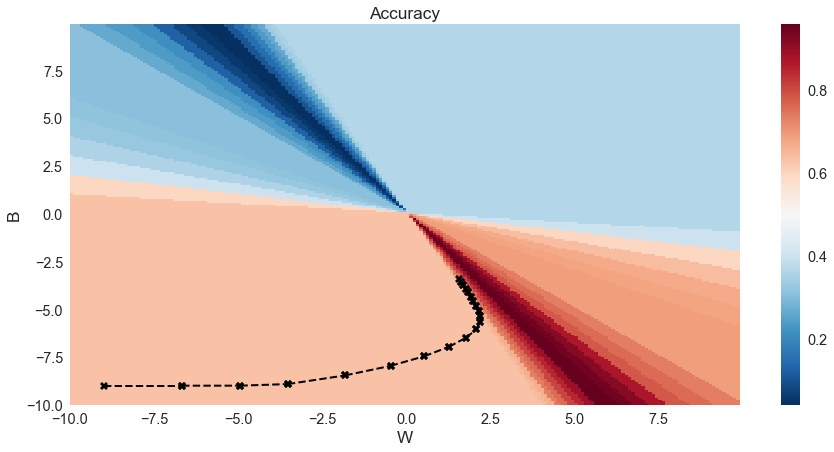

In [45]:
fig , ax = plt.subplots(figsize=(15,7))
plt.pcolormesh(x_grid , y_grid , acc_grid , cmap='RdBu_r')
plt.colorbar()
ax.set(title='Accuracy', xlabel='W', ylabel='B');
model.layers[0].set_weights( [ np.array([[-9]]) , np.array([-9]) ] ) 
for i in range(20):
    old_w , old_b = model.get_weights()[0][0][0], model.get_weights()[1][0]
    model.fit( iris[['petal_width']] , iris['isVirginica'] , epochs=30 , verbose=0 )
    new_w , new_b = model.get_weights()[0][0][0] , model.get_weights()[1][0]
    plt.plot([old_w , new_w] , [old_b ,new_b] , 'kX--' , markersize=8 ,linewidth=2 )  

## Problem: the accuracy is constant on huge zones

# 2.2 Loss function

<font size=6>
$$\text{Loss} := -\frac{1}{n}\sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$
</font>

* <font size=6>n = number of samples</font>
*  <font size=6>$y_i\in \{0,1\}$ is the class (=species) of the i-th sample</font>

*  <font size=6>$p_i \in [0,1]$ is the predicted probability $P(x_i)$ calculated by the model</font>

If $y=1$ 
$$ -\big(y \log(p) + (1-y)\log(1-p)\big)  = -\log(p)$$

If $y=0$ 
$$ -\big(y \log(p) + (1-y)\log(1-p) \big)  =  -\log(1-p)$$

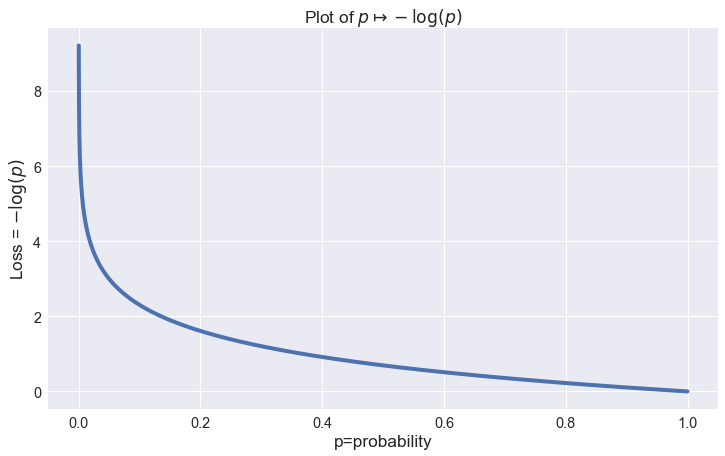

In [46]:
probas = np.arange(0,1,.0001)
plt.figure(figsize=(12,7))
plt.plot(probas , - np.log(probas) )
plt.xlabel('p=probability')
plt.ylabel('Loss = $-\log(p)$')
plt.title('Plot of $p \mapsto  -\log(p)$');

In [47]:
model.metrics_names

['loss', 'acc']

In [48]:
model.evaluate( iris[['petal_width']] , iris['isVirginica'] )

150/150 [==============================] - 0s 216us/step


[0.622089745203654, 0.7799999996026357]

In [49]:
def get_loss( w , b ):
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[ w ]]) , np.array([ b ]) ] ) 
    loss = model.evaluate(iris[['petal_width']], iris[['isVirginica']], verbose=0 )[0]
    return loss
vloss = np.vectorize(get_loss)

In [50]:
loss_grid = vloss(x_grid,y_grid)  

KeyboardInterrupt: 

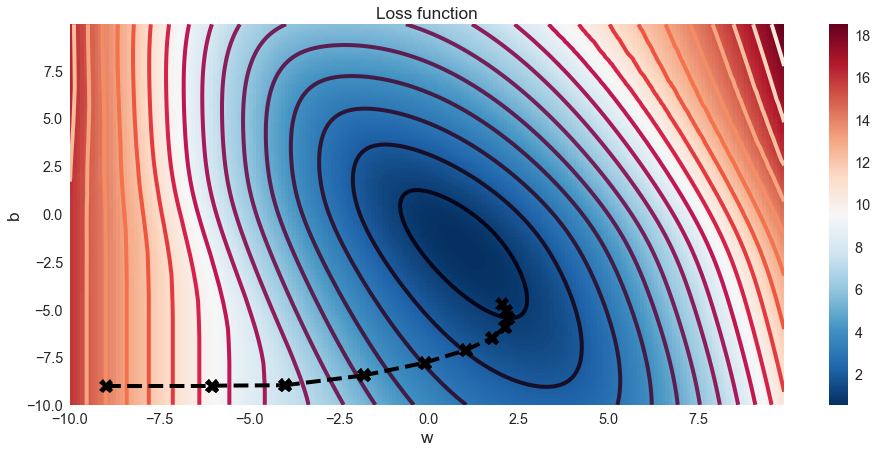

In [53]:
fig , ax_loss = plt.subplots(figsize=(16,7))
plt.pcolormesh(x_grid , y_grid , loss_grid  , cmap='RdBu_r')
plt.colorbar(); plt.contour(x_grid, y_grid, loss_grid,20)
plt.title('Loss function'); plt.xlabel('w'); plt.ylabel('b');
model.layers[0].set_weights( [ np.array([[-9]]) , np.array([-9]) ] ) 
for i in range(10):
    old_w , old_b = model.get_weights()[0][0][0], model.get_weights()[1][0]
    model.fit(iris[['petal_width']] , iris['isVirginica'] , epochs=40 , verbose=0 )
    new_w , new_b = model.get_weights()[0][0][0] , model.get_weights()[1][0]
    plt.plot( [ old_w , new_w ] , [ old_b , new_b ] , 'kX--' , markersize=14 )

# Gradient descent
* Goal: **minimize** the **loss** of the **model**
* Step by step **change** the parameters in a **direction** to **minimize** the **loss**
* **Direction**: calculated with **backpropagation** (computes **gradient**)

# Part 3
# Neural Networks 

# 3.1 Logistic Regression again

# Replace the species virginica by versicolor

In [54]:
iris['isVersicolor'] = (iris['species'] == 'versicolor').apply(int)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,isVirginica,isVersicolor
140,6.7,3.1,5.6,2.4,virginica,1,0
123,6.3,2.7,4.9,1.8,virginica,1,0
84,5.4,3.0,4.5,1.5,versicolor,0,1
48,5.3,3.7,1.5,0.2,setosa,0,0
138,6.0,3.0,4.8,1.8,virginica,1,0


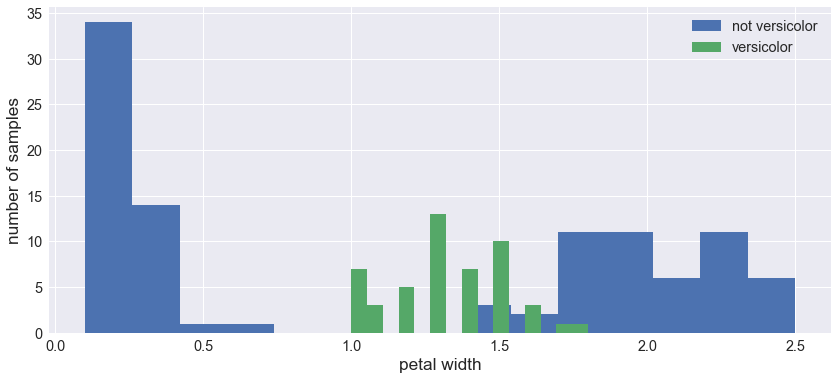

In [55]:
fig, ax = plt.subplots(figsize=(14,6))
iris.groupby('isVersicolor').hist( column='petal_width', ax=ax , bins=15 )
plt.legend( [ 'not versicolor' , 'versicolor' ] )
plt.xlabel('petal width'); plt.ylabel('number of samples'); plt.title('');

## Goal: determine if an iris is a versicolor knowing its petal width

In [56]:
model = Sequential([
    Dense( 1 , input_dim=1 ) ,
    Activation('sigmoid') ,
])

In [57]:
model.compile( optimizer='sgd' , loss='binary_crossentropy' , metrics=['accuracy'] )

In [58]:
model.fit( iris[['petal_width']] , iris['isVersicolor'] , epochs=500 );

Epoch 1/500
150/150 [==============================] - 0s 586us/step - loss: 0.8343 - acc: 0.6667
Epoch 2/500
150/150 [==============================] - 0s 76us/step - loss: 0.8293 - acc: 0.6667
Epoch 3/500
150/150 [==============================] - 0s 72us/step - loss: 0.8246 - acc: 0.6667
Epoch 4/500
150/150 [==============================] - 0s 68us/step - loss: 0.8198 - acc: 0.6667
Epoch 5/500
150/150 [==============================] - 0s 73us/step - loss: 0.8151 - acc: 0.6667
Epoch 6/500
150/150 [==============================] - 0s 90us/step - loss: 0.8106 - acc: 0.6667
Epoch 7/500
150/150 [==============================] - 0s 75us/step - loss: 0.8062 - acc: 0.6667
Epoch 8/500
150/150 [==============================] - 0s 69us/step - loss: 0.8019 - acc: 0.6667
Epoch 9/500
150/150 [==============================] - 0s 76us/step - loss: 0.7977 - acc: 0.6667
Epoch 10/500
150/150 [==============================] - 0s 91us/step - loss: 0.7938 - acc: 0.6667
Epoch 11/500
150/150 [======

150/150 [==============================] - 0s 85us/step - loss: 0.6848 - acc: 0.5800
Epoch 84/500
150/150 [==============================] - 0s 71us/step - loss: 0.6845 - acc: 0.6333
Epoch 85/500
150/150 [==============================] - 0s 77us/step - loss: 0.6840 - acc: 0.6333
Epoch 86/500
150/150 [==============================] - 0s 69us/step - loss: 0.6836 - acc: 0.6333
Epoch 87/500
150/150 [==============================] - 0s 70us/step - loss: 0.6833 - acc: 0.6333
Epoch 88/500
150/150 [==============================] - 0s 69us/step - loss: 0.6830 - acc: 0.6333
Epoch 89/500
150/150 [==============================] - 0s 78us/step - loss: 0.6827 - acc: 0.6333
Epoch 90/500
150/150 [==============================] - 0s 71us/step - loss: 0.6824 - acc: 0.6333
Epoch 91/500
150/150 [==============================] - 0s 79us/step - loss: 0.6819 - acc: 0.6333
Epoch 92/500
150/150 [==============================] - 0s 81us/step - loss: 0.6816 - acc: 0.6333
Epoch 93/500
150/150 [===========

150/150 [==============================] - 0s 68us/step - loss: 0.6654 - acc: 0.6667
Epoch 166/500
150/150 [==============================] - 0s 74us/step - loss: 0.6651 - acc: 0.6667
Epoch 167/500
150/150 [==============================] - 0s 88us/step - loss: 0.6650 - acc: 0.6667
Epoch 168/500
150/150 [==============================] - 0s 62us/step - loss: 0.6648 - acc: 0.6667
Epoch 169/500
150/150 [==============================] - 0s 80us/step - loss: 0.6647 - acc: 0.6667
Epoch 170/500
150/150 [==============================] - 0s 82us/step - loss: 0.6645 - acc: 0.6667
Epoch 171/500
150/150 [==============================] - 0s 73us/step - loss: 0.6644 - acc: 0.6667
Epoch 172/500
150/150 [==============================] - 0s 80us/step - loss: 0.6642 - acc: 0.6667
Epoch 173/500
150/150 [==============================] - 0s 83us/step - loss: 0.6640 - acc: 0.6667
Epoch 174/500
150/150 [==============================] - 0s 87us/step - loss: 0.6640 - acc: 0.6667
Epoch 175/500
150/150 [=

150/150 [==============================] - 0s 82us/step - loss: 0.6538 - acc: 0.6667
Epoch 248/500
150/150 [==============================] - 0s 76us/step - loss: 0.6537 - acc: 0.6667
Epoch 249/500
150/150 [==============================] - 0s 80us/step - loss: 0.6536 - acc: 0.6667
Epoch 250/500
150/150 [==============================] - 0s 80us/step - loss: 0.6535 - acc: 0.6667
Epoch 251/500
150/150 [==============================] - 0s 75us/step - loss: 0.6535 - acc: 0.6667
Epoch 252/500
150/150 [==============================] - 0s 89us/step - loss: 0.6532 - acc: 0.6667
Epoch 253/500
150/150 [==============================] - 0s 73us/step - loss: 0.6532 - acc: 0.6667
Epoch 254/500
150/150 [==============================] - 0s 94us/step - loss: 0.6530 - acc: 0.6667
Epoch 255/500
150/150 [==============================] - 0s 85us/step - loss: 0.6530 - acc: 0.6667
Epoch 256/500
150/150 [==============================] - 0s 86us/step - loss: 0.6528 - acc: 0.6667
Epoch 257/500
150/150 [=

150/150 [==============================] - 0s 83us/step - loss: 0.6462 - acc: 0.6667
Epoch 329/500
150/150 [==============================] - 0s 73us/step - loss: 0.6460 - acc: 0.6667
Epoch 330/500
150/150 [==============================] - 0s 75us/step - loss: 0.6460 - acc: 0.6667
Epoch 331/500
150/150 [==============================] - 0s 90us/step - loss: 0.6460 - acc: 0.6667
Epoch 332/500
150/150 [==============================] - 0s 78us/step - loss: 0.6459 - acc: 0.6667
Epoch 333/500
150/150 [==============================] - 0s 75us/step - loss: 0.6457 - acc: 0.6667
Epoch 334/500
150/150 [==============================] - 0s 92us/step - loss: 0.6457 - acc: 0.6667
Epoch 335/500
150/150 [==============================] - 0s 66us/step - loss: 0.6458 - acc: 0.6667
Epoch 336/500
150/150 [==============================] - 0s 77us/step - loss: 0.6456 - acc: 0.6667
Epoch 337/500
150/150 [==============================] - 0s 86us/step - loss: 0.6456 - acc: 0.6667
Epoch 338/500
150/150 [=

150/150 [==============================] - 0s 73us/step - loss: 0.6410 - acc: 0.6667
Epoch 411/500
150/150 [==============================] - 0s 72us/step - loss: 0.6410 - acc: 0.6667
Epoch 412/500
150/150 [==============================] - 0s 74us/step - loss: 0.6411 - acc: 0.6667
Epoch 413/500
150/150 [==============================] - 0s 94us/step - loss: 0.6408 - acc: 0.6667
Epoch 414/500
150/150 [==============================] - 0s 90us/step - loss: 0.6408 - acc: 0.6667
Epoch 415/500
150/150 [==============================] - 0s 79us/step - loss: 0.6407 - acc: 0.6667
Epoch 416/500
150/150 [==============================] - 0s 76us/step - loss: 0.6406 - acc: 0.6667
Epoch 417/500
150/150 [==============================] - 0s 73us/step - loss: 0.6406 - acc: 0.6667
Epoch 418/500
150/150 [==============================] - 0s 78us/step - loss: 0.6406 - acc: 0.6667
Epoch 419/500
150/150 [==============================] - 0s 74us/step - loss: 0.6406 - acc: 0.6667
Epoch 420/500
150/150 [=

Epoch 492/500
150/150 [==============================] - 0s 97us/step - loss: 0.6374 - acc: 0.6667
Epoch 493/500
150/150 [==============================] - 0s 84us/step - loss: 0.6373 - acc: 0.6667
Epoch 494/500
150/150 [==============================] - 0s 86us/step - loss: 0.6373 - acc: 0.6667
Epoch 495/500
150/150 [==============================] - 0s 77us/step - loss: 0.6373 - acc: 0.6667
Epoch 496/500
150/150 [==============================] - 0s 73us/step - loss: 0.6372 - acc: 0.6667
Epoch 497/500
150/150 [==============================] - 0s 88us/step - loss: 0.6373 - acc: 0.6667
Epoch 498/500
150/150 [==============================] - 0s 82us/step - loss: 0.6372 - acc: 0.6667
Epoch 499/500
150/150 [==============================] - 0s 76us/step - loss: 0.6371 - acc: 0.6667
Epoch 500/500
150/150 [==============================] - 0s 79us/step - loss: 0.6371 - acc: 0.6667


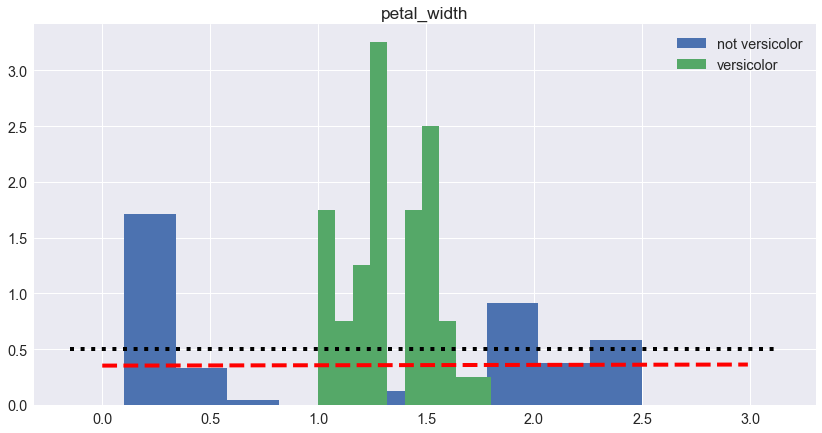

In [59]:
fig, ax = plt.subplots(figsize=(14,7))
iris.groupby('isVersicolor').hist(column='petal_width', normed=True, ax=ax)
plt.legend(['not versicolor', 'versicolor'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba  ,'r--' )
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted');

<font size=8><center> We want</center></font>| <font size=8><center>We don't want</center> </font>
--------|-----------
![non monotonic curve](../figures/img/graph_nn.png) | ![monotonic curve](../figures/img/graph_logistic.png) 

<font size=7>**BAD NEWS**: PREDICTED PROBABILITIES BY LOGISTIC REGRESSION CAN NOT GO UP AND DOWN</font>

# 3.2 Neural networks with hidden layers

![NN](../figures/img/01-log.png)

![NN](../figures/img/nn_color.png)
$$y = W_1y_1 + W_2y_2 + W_3y_3 + B$$ 

![NN](../figures/img/nn_color.png)

In [60]:
model = Sequential( [
Dense( 3 , input_dim=1 ) , 
Activation('sigmoid') ,
Dense(1) ,
Activation('sigmoid')
] )

In [61]:
model.compile(optimizer=optimizers.SGD(lr=.1), loss='binary_crossentropy', metrics = ['acc'])

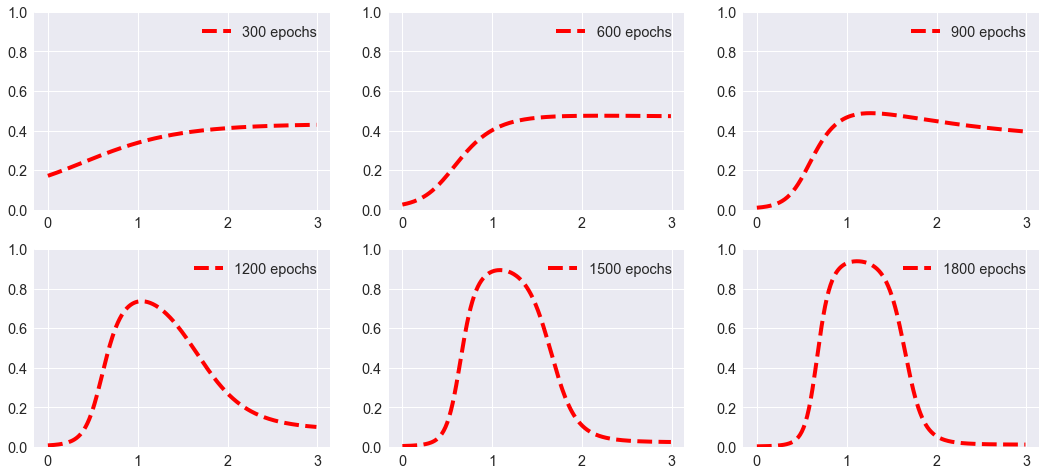

In [62]:
plt.subplots(nrows=2  , ncols=3 , figsize=(18,8) , sharex=True , sharey=True)
for i in range(1,7):
    plt.subplot(2 , 3 , i)
    model.fit( iris[['petal_width']] , iris['isVersicolor'] , epochs=300 , verbose=0 )
    probas = model.predict(petal_widths.reshape(-1,1))[:,0]
    plt.plot( petal_widths , probas , 'r--' , label='{} epochs'.format(i*300))
    plt.ylim((0,1))
    plt.legend()

In [63]:
model.evaluate( iris[['petal_width']] , iris['isVersicolor'] )

150/150 [==============================] - 0s 318us/step


[0.1392471843957901, 0.9600000015894572]

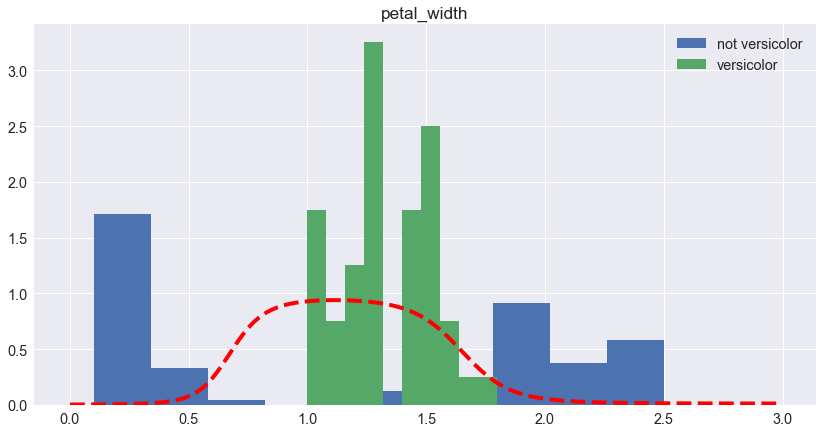

In [64]:
fig, ax = plt.subplots(figsize=(14,7))
iris.groupby('isVersicolor').hist(column='petal_width' , normed=True , ax=ax)
plt.legend(['not versicolor', 'versicolor'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths , predicted_proba , 'r--');

# Conclusion

* Neural Networks are **models** depending on **parameters**

* **Logistic Regression**: the simplest neural network 

* Neural Networks are made of **layers**. More layers = more expressivity

* Behind the hood: **fit** the **parameters** with the **data** to **minimize** the **loss**

* **Keras**: easy interface to use Neural Networks

# <center>Thank you for your attention</center>